In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

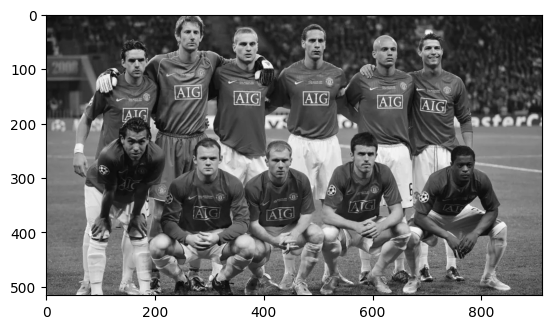

In [ ]:
image = cv2.imread('manchester.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap = 'gray')
plt.show()

In [ ]:
def apply_filter(image, filter):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    filtered_dft = dft_shift * filter
    dft_ishift = np.fft.ifftshift(filtered_dft)
    result = np.fft.ifft2(dft_ishift)
    result = np.abs(result)

    return result

In [ ]:
def ideal_filter(shape, cutoff, high_pass=True):
    rows, cols = shape
    center = (rows / 2, cols / 2)
    filter_ = np.zeros((rows, cols), dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2)
            if high_pass:
                filter_[i, j] = 1 if distance > cutoff else 0
            else:
                filter_[i, j] = 1 if distance <= cutoff else 0
    return filter_

def butterworth_filter(shape, cutoff, order, high_pass=True):
    rows, cols = shape
    center = (rows / 2, cols / 2)
    filter_ = np.zeros((rows, cols), dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2)
            if distance == 0:
                distance = 1e-10
            if high_pass:
                filter_[i, j] = 1 / (1 + (cutoff / distance) ** (2 * order))
            else:
                filter_[i, j] = 1 / (1 + (distance / cutoff) ** (2 * order))
    return filter_

def gaussian_filter(shape, cutoff, high_pass=True):
    rows, cols = shape
    center = (rows / 2, cols / 2)
    filter_ = np.zeros((rows, cols), dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2)
            if high_pass:
                filter_[i, j] = 1 - np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
            else:
                filter_[i, j] = np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
    return filter_

In [ ]:
def plot_results(img, filters, titles):
    fig, axes = plt.subplots(2, len(filters) + 1, figsize=(15, 5))

    axes[0, 0].imshow(img, cmap='gray')
    axes[0, 0].set_title('Исходное изображение')
    axes[0, 0].axis('off')

    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)
    spectrum = 20 * np.log1p(np.abs(dft_shift))
    axes[1, 0].imshow(spectrum, cmap='gray')
    axes[1, 0].set_title('Начальный спектр')
    axes[1, 0].axis('off')

    for i, (filter_, title) in enumerate(zip(filters, titles)):
        filtered_img = apply_filter(img, filter_)
        axes[0, i + 1].imshow(filtered_img, cmap='gray')
        axes[0, i + 1].set_title(f'{title} фильтр')
        axes[0, i + 1].axis('off')

        filtered_dft = dft_shift * filter_
        filtered_spectrum = 20 * np.log1p(np.abs(filtered_dft))
        axes[1, i + 1].imshow(filtered_spectrum, cmap='gray')
        axes[1, i + 1].set_title(f'{title} спектр')
        axes[1, i + 1].axis('off')

    plt.tight_layout()
    plt.show()

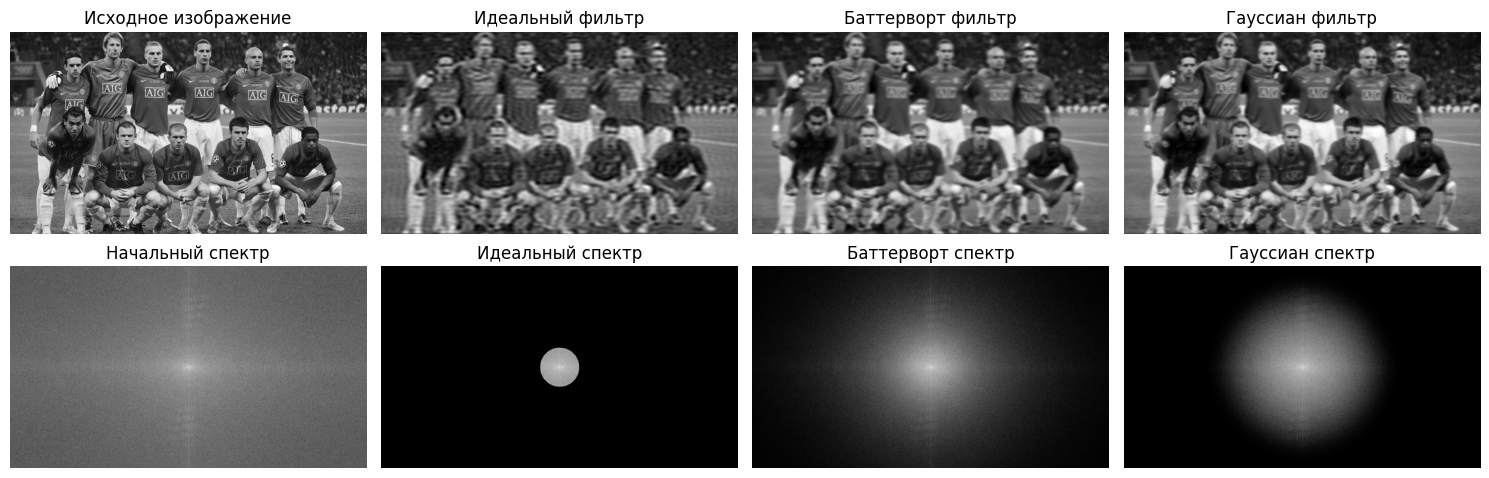

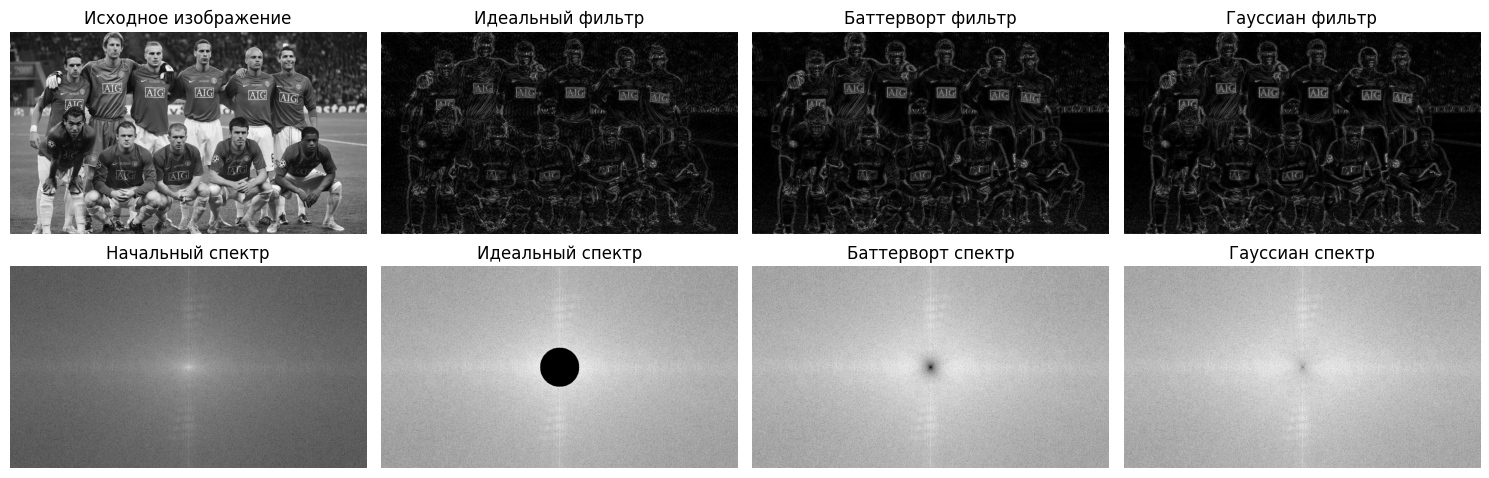

In [20]:
cutoff = 50 #Срез
order = 2 # Порядок фильтра

# низкочастотные фильтры
ideal_lp = ideal_filter(image.shape, cutoff, high_pass=False)
butterworth_lp = butterworth_filter(image.shape, cutoff, order, high_pass=False)
gaussian_lp = gaussian_filter(image.shape, cutoff, high_pass=False)

filters = [ideal_lp, butterworth_lp, gaussian_lp]
titles = ['Идеальный', 'Баттерворт', 'Гауссиан']

plot_results(image, filters, titles)

# высокочастотные фильтры
ideal_hp = ideal_filter(image.shape, cutoff, high_pass=True)
butterworth_hp = butterworth_filter(image.shape, cutoff, order, high_pass=True)
gaussian_hp = gaussian_filter(image.shape, cutoff, high_pass=True)

filters_hp = [ideal_hp, butterworth_hp, gaussian_hp]
titles_hp = ['Идеальный', 'Баттерворт', 'Гауссиан']

plot_results(image, filters_hp, titles_hp)